In [9]:

import pandas as pd
from glob import glob
from pathlib import Path


In [12]:
# Load clinical data
demographics_df = pd.read_csv('participants.tsv', sep='\t')

# Load and concatenate all subject data files
subject_files = glob('/cifs/trident/projects/mouse_appmaptapoe/lightsheet/derivatives/SPIMquant/v0.1.1-alpha/sub-*/micr/sub*seg-roi22_from-ABAv3_dslevel-5_desc-otsupenalty_segstats.tsv')
subject_data_list = []

for file in subject_files:
    subject_df = pd.read_csv(file, sep='\t')
    participant_id = Path(file).name.split('_')[0]
    subject_df['participant_id'] = participant_id  # Add participant ID column
    subject_data_list.append(subject_df)

all_subject_data = pd.concat(subject_data_list)

# Merge subject data with clinical data
merged_data = all_subject_data.merge(demographics_df, on='participant_id')

In [13]:
merged_data

,index,name,abbreviation,volume,avg_fieldfrac,participant_id,participant_label,genotype,group_label,suspected_abeta_load,sex,foldername
0,1,L_Olfactory areas,L_OLF,0.0,0.121566,sub-o21,o21,hAPPNL-F_MAPT_ApoE4,4,High,Female,240502_Kate_mouse_brain_21_4x1_22-29-22
1,2,R_Olfactory areas,R_OLF,0.0,0.245961,sub-o21,o21,hAPPNL-F_MAPT_ApoE4,4,High,Female,240502_Kate_mouse_brain_21_4x1_22-29-22
2,3,L_Isocortex,L_Iso,0.0,0.740855,sub-o21,o21,hAPPNL-F_MAPT_ApoE4,4,High,Female,240502_Kate_mouse_brain_21_4x1_22-29-22
3,4,R_Isocortex,R_ISO,0.0,0.803251,sub-o21,o21,hAPPNL-F_MAPT_ApoE4,4,High,Female,240502_Kate_mouse_brain_21_4x1_22-29-22
4,5,L_Hippocampal formation,L_HYP,0.0,0.286133,sub-o21,o21,hAPPNL-F_MAPT_ApoE4,4,High,Female,240502_Kate_mouse_brain_21_4x1_22-29-22
...,...,...,...,...,...,...,...,...,...,...,...,...
149,18,R_Midbrain,R_MB,0.0,0.141646,sub-o28,o28,hAPPNL-F_MAPT_ApoE4,4,High,Male,240524_Kate_mouse_brain_28_4x1_09-11-51
150,19,L_Hindbrain,L_HB,0.0,0.281070,sub-o28,o28,hAPPNL-F_MAPT_ApoE4,4,High,Male,240524_Kate_mouse_brain_28_4x1_09-11-51
151,20,R_Hindbrain,R_HB,0.0,0.583735,sub-o28,o28,hAPPNL-F_MAPT_ApoE4,4,High,Male,240524_Kate_mouse_brain_28_4x1_09-11-51
152,21,L_Cerebellum,L_CEB,0.0,1.575169,sub-o28,o28,hAPPNL-F_MAPT_ApoE4,4,High,Male,240524_Kate_mouse_brain_28_4x1_09-11-51


In [15]:
# Optional: Pivot data to have each ROI as a separate column for `avg_fieldfrac`
pivoted_data = merged_data.pivot_table(index=['participant_id', 'genotype', 'group_label', 'suspected_abeta_load', 'sex'],
                                       columns='name', values='avg_fieldfrac').reset_index()
pivoted_data

name,participant_id,genotype,group_label,suspected_abeta_load,sex,L_Amygdala,L_Cerebellum,L_Hindbrain,L_Hippocampal formation,L_Hypothalamus,...,R_Cerebellum,R_Hindbrain,R_Hippocampal formation,R_Hypothalamus,R_Isocortex,R_Midbrain,R_Olfactory areas,R_Pallidum,R_Striatum,R_Thalamus
0,sub-o21,hAPPNL-F_MAPT_ApoE4,4,High,Female,0.264551,0.267594,0.205322,0.286133,0.069805,...,0.189097,0.266559,0.771739,0.026722,0.803251,0.053875,0.245961,0.021148,0.047816,0.093781
1,sub-o22,hAPPNL-F_MAPT_ApoE4,4,High,Female,0.390128,0.533197,0.160452,0.627578,0.149408,...,0.506458,0.076194,0.263962,0.271586,0.808260,0.106475,0.191987,0.076589,0.054702,0.037277
2,sub-o23,hAPPNL-F_MAPT_ApoE4,4,High,Female,0.274217,0.259580,0.136865,0.538147,0.039209,...,0.476075,0.153302,0.476138,0.222794,0.598066,0.103565,0.241424,0.602296,0.164226,0.505074
3,sub-o24,hAPPNL-F_MAPT_ApoE4,4,High,Female,0.086000,0.557853,0.160503,0.280232,0.268636,...,0.848274,0.313618,0.230401,0.293162,0.561923,0.109349,0.136009,0.105649,0.156848,0.637020
4,sub-o25,hAPPNL-F_MAPT_ApoE4,4,High,Male,0.609605,15.103077,71.403994,0.937392,12.897006,...,18.937718,72.844513,3.811505,42.702274,6.796936,35.943113,7.171024,87.084563,76.645827,42.775046
5,sub-o27,hAPPNL-F_MAPT_ApoE4,4,High,Male,0.479752,28.788864,80.814030,8.984936,1.055805,...,33.080843,63.181653,6.953548,12.020671,2.830809,29.970617,1.746036,20.862386,19.801527,60.139284
6,sub-o28,hAPPNL-F_MAPT_ApoE4,4,High,Male,0.877724,1.575169,0.281070,0.415598,0.378609,...,0.472032,0.583735,0.374845,0.166308,0.611303,0.141646,0.270908,1.093880,0.351629,0.611630


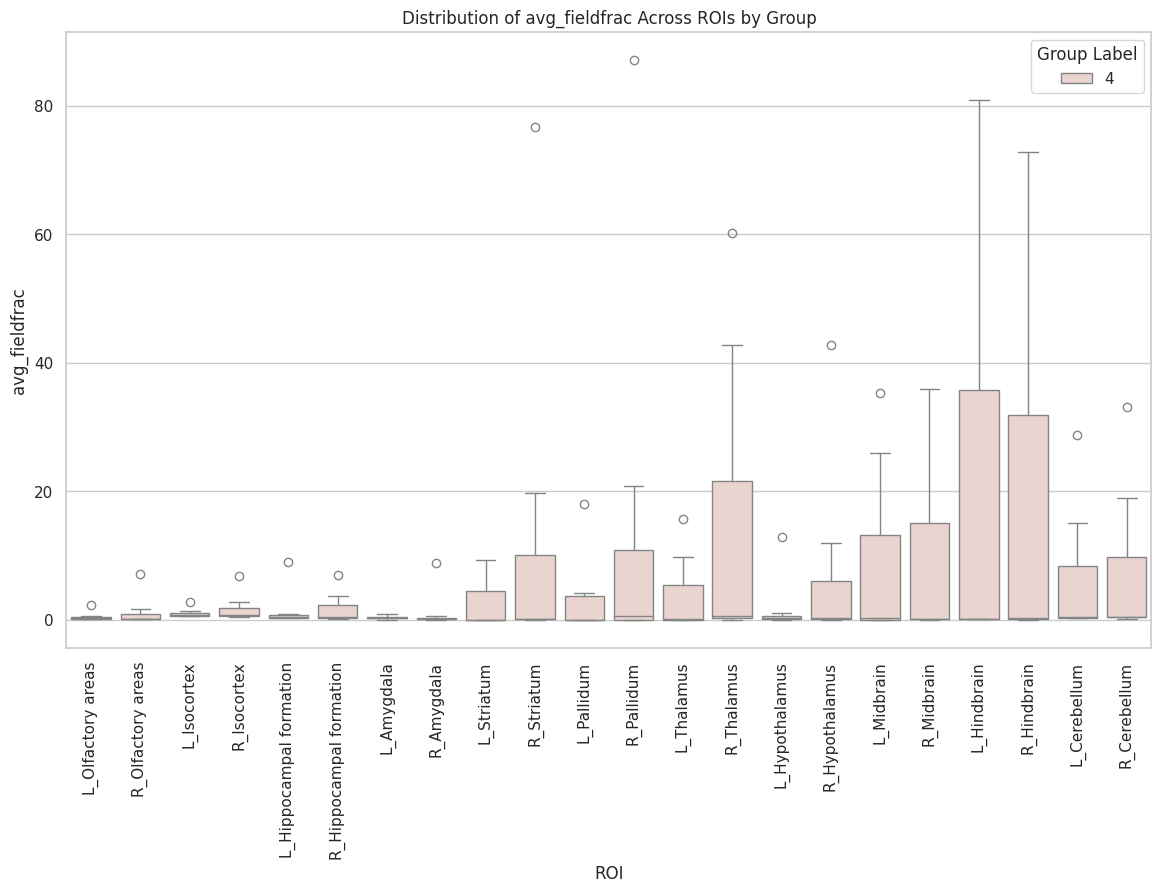

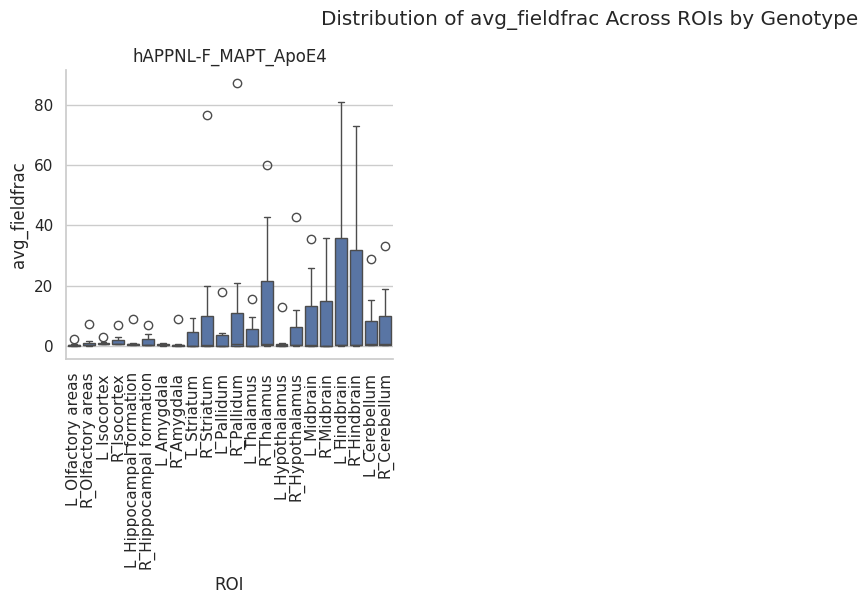

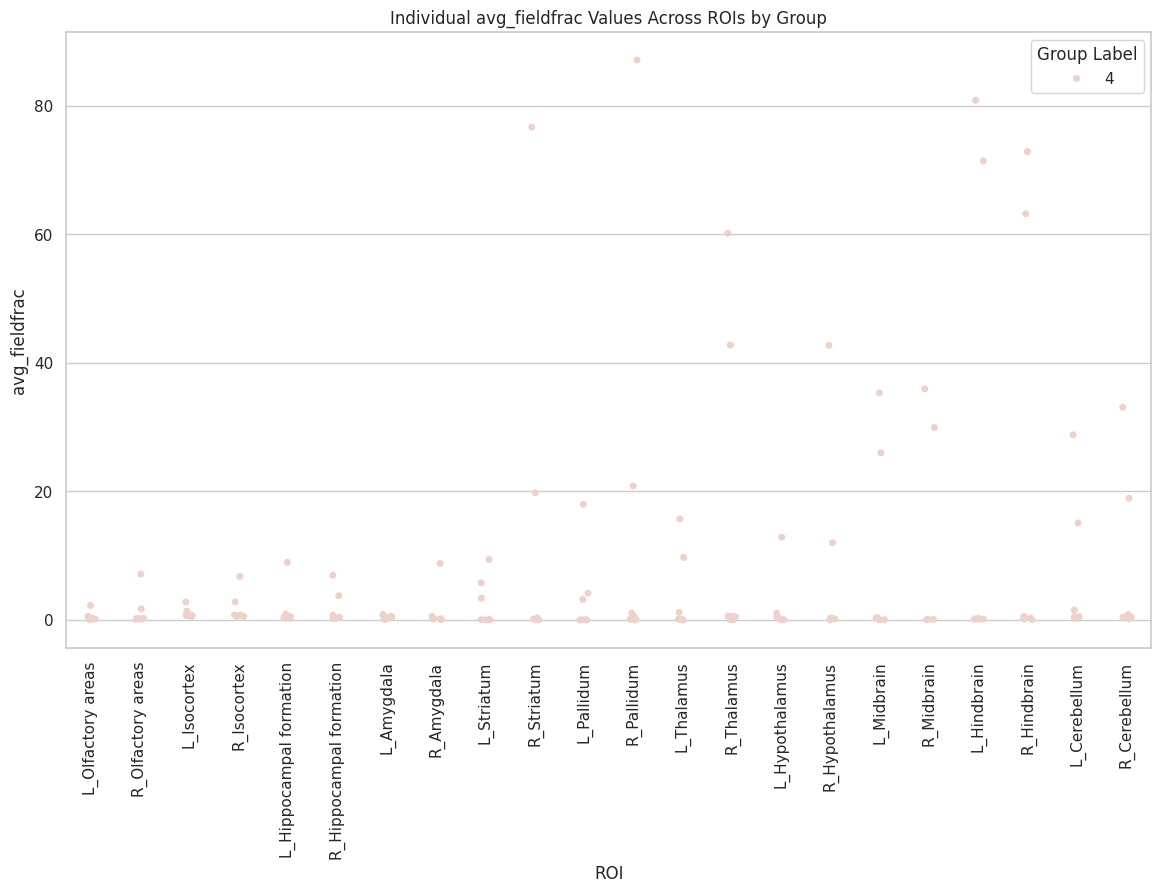

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up plotting style for consistency
sns.set(style="whitegrid")

# 1. Boxplot - avg_fieldfrac by group for each ROI
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_data, x='name', y='avg_fieldfrac', hue='group_label')
plt.xticks(rotation=90)
plt.title('Distribution of avg_fieldfrac Across ROIs by Group')
plt.xlabel('ROI')
plt.ylabel('avg_fieldfrac')
plt.legend(title='Group Label')
plt.show()

# 2. FacetGrid - avg_fieldfrac by genotype for each ROI
g = sns.FacetGrid(merged_data, col='genotype', col_wrap=3, height=4, sharey=True)
g.map(sns.boxplot, 'name', 'avg_fieldfrac', order=merged_data['name'].unique())
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
g.set_axis_labels('ROI', 'avg_fieldfrac')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribution of avg_fieldfrac Across ROIs by Genotype', y=1.05)
plt.show()

# 3. Strip Plot - avg_fieldfrac by group, showing each individual value for each ROI
plt.figure(figsize=(14, 8))
sns.stripplot(data=merged_data, x='name', y='avg_fieldfrac', hue='group_label', jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.title('Individual avg_fieldfrac Values Across ROIs by Group')
plt.xlabel('ROI')
plt.ylabel('avg_fieldfrac')
plt.legend(title='Group Label')
plt.show()
